In [226]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
import yfinance as yf
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [157]:
Soybeans=yf.Ticker("ZS=F")
Corn=yf.Ticker("ZC=F")
Wheat=yf.Ticker("ZW=F")
Cotton=yf.Ticker("CT=F")
Crude=yf.Ticker("CL=F")
USDBRL=yf.Ticker("BRL=X")
EURUSD=yf.Ticker("EURUSD=X")
IR=yf.Ticker("^TNX")



In [158]:
#Soybeans_H=Soybeans.history(period="Max").sort_values(by="Date", ascending=False).drop(["Dividends", "Stock Splits","Open"], axis=1)
#Soybeans_H["Range"]=Soybeans_H["High"]-Soybeans_H["Low"]
#Soybeans_H=Soybeans_H.drop(["High","Low"], axis=1)
#Soybeans_H

In [232]:
Soybeans_H=Soybeans.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
Soybeans_H["Range"]=Soybeans_H["High"]-Soybeans_H["Low"]
Soybeans_H=Soybeans_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

Soybeans_H['log_rtn'] = np.log(Soybeans_H['Close']).diff()

# Var Swap (returns are not demeaned)
Soybeans_H['real_var'] = np.square(Soybeans_H['log_rtn']).rolling(window).sum() * ann_factor
Soybeans_H['Vol'] = np.sqrt(Soybeans_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

Soybeans_P=Soybeans_H[:len(Soybeans_H)-90]
Soybeans_P=Soybeans_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Soybeans_H=Soybeans_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Soybeans_H

,Close,Range,Vol
Date,,,
2021-03-16,1418.00,12.25,0.208127
2021-03-12,1415.75,29.25,0.208293
2021-03-11,1415.50,14.00,0.211932
2021-03-10,1411.50,30.25,0.212049
2021-03-09,1441.25,13.50,0.209248
...,...,...,...
2001-01-31,459.75,1.25,0.169929
2001-01-30,461.25,1.50,0.170212
2001-01-29,459.75,2.25,0.170160


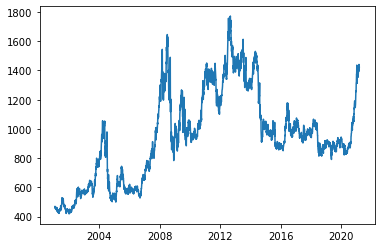

In [160]:
plt.plot(Soybeans_H["Close"])
plt.show()

In [161]:
Corn_H=Corn.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
Corn_H["Range"]=Corn_H["High"]-Corn_H["Low"]
Corn_H=Corn_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

Corn_H['log_rtn'] = np.log(Corn_H['Close']).diff()

# Var Swap (returns are not demeaned)
Corn_H['real_var'] = np.square(Corn_H['log_rtn']).rolling(window).sum() * ann_factor
Corn_H['Vol'] = np.sqrt(Corn_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

Corn_P=Corn_H[:len(Corn_H)-90]
Corn_P=Corn_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Corn_H=Corn_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Corn_H

,Close,Range,Vol
Date,,,
2021-03-15,548.50,18.00,0.248565
2021-03-12,549.25,7.00,0.248871
2021-03-11,555.00,9.25,0.255259
2021-03-10,547.75,17.00,0.254406
2021-03-09,562.00,10.75,0.250822
...,...,...,...
2000-12-26,220.00,1.00,0.183245
2000-12-21,218.00,0.00,0.183278
2000-12-18,215.50,0.00,0.185854


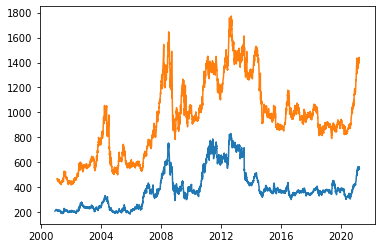

In [162]:
plt.plot(Corn_H["Close"])
plt.plot(Soybeans_H["Close"])
plt.show()

In [163]:
Wheat_H=Wheat.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
Wheat_H["Range"]=Wheat_H["High"]-Wheat_H["Low"]
Wheat_H=Wheat_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

Wheat_H['log_rtn'] = np.log(Wheat_H['Close']).diff()

# Var Swap (returns are not demeaned)
Wheat_H['real_var'] = np.square(Wheat_H['log_rtn']).rolling(window).sum() * ann_factor
Wheat_H['Vol'] = np.sqrt(Wheat_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

Wheat_P=Wheat_H[:len(Wheat_H)-90]
Wheat_P=Wheat_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Wheat_H=Wheat_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)#[:len(Soybeans_H)]
Wheat_H

,Close,Range,Vol
Date,,,
2021-03-15,644.50,10.50,0.274903
2021-03-12,631.75,0.00,0.273211
2021-03-11,636.25,13.75,0.273623
2021-03-10,650.75,10.25,0.271257
2021-03-09,656.50,5.75,0.272990
...,...,...,...
2000-11-30,252.50,2.00,0.245302
2000-11-29,256.25,1.75,0.244064
2000-11-28,256.50,1.75,0.244438


In [164]:

Cotton_H=Cotton.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
Cotton_H["Range"]=Cotton_H["High"]-Cotton_H["Low"]
Cotton_H=Cotton_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

Cotton_H['log_rtn'] = np.log(Cotton_H['Close']).diff()

# Var Swap (returns are not demeaned)
Cotton_H['real_var'] = np.square(Cotton_H['log_rtn']).rolling(window).sum() * ann_factor
Cotton_H['Vol'] = np.sqrt(Cotton_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])
Cotton_P=Cotton_H[:len(Cotton_H)-90]
Cotton_P=Cotton_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Cotton_H=Cotton_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)#[:len(Soybeans_H)]
Cotton_P

,Close,Range,Vol
Date,,,
2020-10-29,69.820000,0.879997,0.201191
2020-10-28,70.169998,2.549995,0.201494
2020-10-27,72.029999,0.769997,0.198378
2020-10-26,72.110001,1.159996,0.198655
2020-10-23,71.290001,0.810005,0.197785
...,...,...,...
2000-05-17,62.070000,1.299999,0.257533
2000-05-16,62.619999,0.550003,0.263868
2000-05-15,62.750000,1.489998,0.264379


In [165]:
Crude_H=Crude.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
Crude_H["Range"]=Crude_H["High"]-Crude_H["Low"]
Crude_H=Crude_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

Crude_H['log_rtn'] = np.log(Crude_H['Close']).diff()

# Var Swap (returns are not demeaned)
Crude_H['real_var'] = np.square(Crude_H['log_rtn']).rolling(window).sum() * ann_factor
Crude_H['Vol'] = np.sqrt(Crude_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

Crude_P=Crude_H[:len(Crude_H)-90]
Crude_P=Crude_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Crude_H=Crude_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
Crude_H

C:\Users\dorit\anaconda3\envs\PythonData\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Close,Range,Vol
Date,,,
2021-03-15,65.360001,2.270004,0.325112
2021-03-12,65.610001,0.829994,0.329755
2021-03-11,66.019997,1.669998,0.342960
2021-03-10,64.440002,1.829998,0.343293
2021-03-09,64.010002,2.350002,0.347501
...,...,...,...
2001-01-09,27.719999,0.850000,0.480530
2001-01-08,27.350000,1.250000,0.480065
2001-01-05,28.000000,1.000000,0.480317


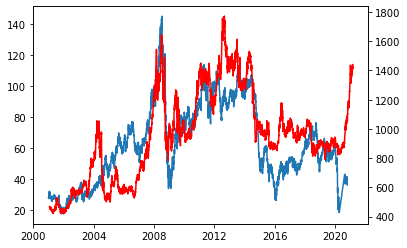

In [166]:
fig,ax=plt.subplots()
ax.plot(Crude_P["Close"])
ax2=ax.twinx()
ax2.plot(Soybeans_H["Close"], color="red")

plt.show()

In [167]:
USDBRL_H=USDBRL.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)

USDBRL_H["Range"]=USDBRL_H["High"]-USDBRL_H["Low"]
USDBRL_H=USDBRL_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

USDBRL_H['log_rtn'] = np.log(USDBRL_H['Close']).diff()

# Var Swap (returns are not demeaned)
USDBRL_H['real_var'] = np.square(USDBRL_H['log_rtn']).rolling(window).sum() * ann_factor
USDBRL_H['Vol'] = np.sqrt(USDBRL_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

USDBRL_P=USDBRL_H[:len(USDBRL_H)-90]
USDBRL_P=USDBRL_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
USDBRL_H=USDBRL_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)#[:len(Soybeans_H)]
USDBRL_H

,Close,Range,Vol
Date,,,
2021-03-15,5.6100,0.125200,0.184327
2021-03-12,5.5348,0.049990,0.189493
2021-03-11,5.6711,0.130500,0.189723
2021-03-10,5.8015,0.142712,0.187812
2021-03-09,5.8746,0.078000,0.186683
...,...,...,...
2004-04-09,2.8840,0.000000,0.079259
2004-04-08,2.8840,0.014000,0.079424
2004-04-07,2.8700,0.016000,0.079301


In [168]:
EURUSD_H=EURUSD.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
EURUSD_H["Range"]=EURUSD_H["High"]-EURUSD_H["Low"]
EURUSD_H=EURUSD_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

EURUSD_H['log_rtn'] = np.log(EURUSD_H['Close']).diff()

# Var Swap (returns are not demeaned)
EURUSD_H['real_var'] = np.square(EURUSD_H['log_rtn']).rolling(window).sum() * ann_factor
EURUSD_H['Vol'] = np.sqrt(EURUSD_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

EURUSD_P=EURUSD_H[:len(EURUSD_H)-90]
EURUSD_P=EURUSD_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
EURUSD_H=EURUSD_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)#[:len(Soybeans_H)]
EURUSD_H


,Close,Range,Vol
Date,,,
2021-03-15,1.193460,0.005419,0.058967
2021-03-12,1.198610,0.007983,0.059487
2021-03-11,1.192606,0.006066,0.060113
2021-03-10,1.189791,0.005506,0.060130
2021-03-09,1.185171,0.007986,0.062167
...,...,...,...
2004-04-09,1.208605,0.004604,0.123308
2004-04-08,1.207700,0.015008,0.124165
2004-04-07,1.216604,0.013900,0.123692


In [169]:

IR_H=IR.history(period="Max").drop(["Dividends", "Stock Splits","Open","Volume"], axis=1)
IR_H["Range"]=IR_H["High"]-IR_H["Low"]
IR_H=IR_H.drop(["High","Low"], axis=1)
window = 90  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window

IR_H['log_rtn'] = np.log(IR_H['Close']).diff()

# Var Swap (returns are not demeaned)
IR_H['real_var'] = np.square(IR_H['log_rtn']).rolling(window).sum() * ann_factor
IR_H['Vol'] = np.sqrt(IR_H['real_var'])

# Classical (returns are demeaned, dof=1)
#df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
#df['real_vol'] = np.sqrt(df['real_var'])

IR_P=IR_H[:len(IR_H)-90]
IR_P=IR_P.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)
IR_H=IR_H.sort_values(by="Date", ascending=False).dropna().drop(["log_rtn","real_var"],axis=1)#[:len(Soybeans_H)]
IR_P

,Close,Range,Vol
Date,,,
2020-10-29,0.835,0.073,0.661255
2020-10-28,0.781,0.037,0.651831
2020-10-27,0.778,0.025,0.652013
2020-10-26,0.801,0.027,0.650228
2020-10-23,0.841,0.041,0.651550
...,...,...,...
1962-05-17,3.870,0.000,0.082033
1962-05-16,3.860,0.000,0.082024
1962-05-15,3.870,0.000,0.082863


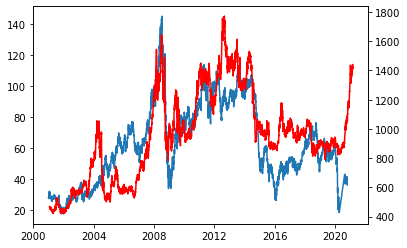

In [170]:
fig,ax=plt.subplots()
ax.plot(Crude_P["Close"])
ax2=ax.twinx()
ax2.plot(Soybeans_H["Close"], color="red")

plt.show()

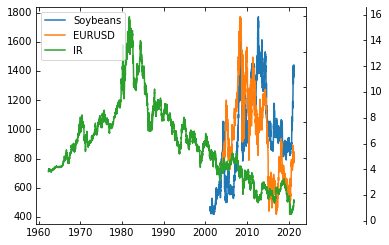

In [171]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)



#host.set_xlabel("Distance")
#host.set_ylabel("Density")
#par1.set_ylabel("Temperature")
#par2.set_ylabel("Velocity")

p1, = host.plot(Soybeans_H["Close"], label="Soybeans")
p2, = par1.plot(EURUSD_H["Close"], label="EURUSD")
p3, = par2.plot(IR_H["Close"], label="IR")

#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

plt.draw()
plt.show()


In [172]:
Soybeans_H=Soybeans_H.rename(columns={"Range": "Soybeans Range", "Close": "Soybeans Close", "Vol" : "Soybeans Vol"})[:len(USDBRL_H)]
Corn_H=Corn_H.rename(columns={"Range": "Corn Range", "Close": "Corn Close", "Vol" : "Corn Vol"})[:len(USDBRL_H)]

Wheat_H=Wheat_H.rename(columns={"Range": "Wheat Range", "Close": "Wheat Close", "Vol" : "Wheat Vol"})[:len(USDBRL_H)]
Cotton_H=Cotton_H.rename(columns={"Range": "Cotton Range","Close": "Cotton Close", "Vol" : "Cotton Vol"})[:len(USDBRL_H)]
Crude_H=Crude_H.rename(columns={"Range": "Crude Range","Close": "Crude Close", "Vol" : "Crude Vol"})[:len(USDBRL_H)]
USDBRL_H=USDBRL_H.rename(columns={"Range": "USDBRL Range", "Close": "USDBRL Close", "Vol" : "USDBRL Vol"})[:len(USDBRL_H)]
EURUSD_H=EURUSD_H.rename(columns={"Range": "EURUSD Range", "Close": "EURUSD Close", "Vol" : "EURUSD Vol"})[:len(USDBRL_H)]
IR_H=IR_H.rename(columns={"Range": "IR Range", "Close": "IR Close", "Vol" : "IR Vol"})[:len(USDBRL_H)]

In [173]:
Soybeans_P=Soybeans_P.rename(columns={"Range": "Soybeans Range", "Close": "Soybeans Close", "Vol" : "Soybeans Vol"})[:len(USDBRL_P)]
Corn_P=Corn_P.rename(columns={"Range": "Corn Range", "Close": "Corn Close", "Vol" : "Corn Vol"})[:len(USDBRL_P)]

Wheat_P=Wheat_P.rename(columns={"Range": "Wheat Range", "Close": "Wheat Close", "Vol" : "Wheat Vol"})[:len(USDBRL_P)]
Cotton_P=Cotton_P.rename(columns={"Range": "Cotton Range","Close": "Cotton Close", "Vol" : "Cotton Vol"})[:len(USDBRL_P)]
Crude_P=Crude_P.rename(columns={"Range": "Crude Range","Close": "Crude Close", "Vol" : "Crude Vol"})[:len(USDBRL_P)]
USDBRL_P=USDBRL_P.rename(columns={"Range": "USDBRL Range", "Close": "USDBRL Close", "Vol" : "USDBRL Vol"})[:len(USDBRL_P)]
EURUSD_P=EURUSD_P.rename(columns={"Range": "EURUSD Range", "Close": "EURUSD Close", "Vol" : "EURUSD Vol"})[:len(USDBRL_P)]
IR_P=IR_P.rename(columns={"Range": "IR Range", "Close": "IR Close", "Vol" : "IR Vol"})[:len(USDBRL_P)]

In [174]:
IR_P

,IR Close,IR Range,IR Vol
Date,,,
2020-10-29,0.835,0.073,0.661255
2020-10-28,0.781,0.037,0.651831
2020-10-27,0.778,0.025,0.652013
2020-10-26,0.801,0.027,0.650228
2020-10-23,0.841,0.041,0.651550
...,...,...,...
2005-05-11,4.202,0.077,0.164302
2005-05-10,4.222,0.047,0.165155
2005-05-09,4.278,0.022,0.165284


In [175]:
#d={}
Prices = [Corn_H, Wheat_H, Cotton_H, Crude_H, USDBRL_H, EURUSD_H, IR_H]
Prices_P= [Corn_P, Wheat_P, Cotton_P, Crude_P, USDBRL_P, EURUSD_P, IR_P]

#for price in Prices:
    #d[price]= price.history(period="Max")

In [176]:
#d[Corn].sort_values(by="Date", ascending=False)
#for price in Prices:
    #price.sort_values(by="Date", ascending=False)

In [177]:
for price in Prices:
    print (price.shape)

(3954, 3)
(3954, 3)
(3954, 3)
(3954, 3)
(3954, 3)
(3954, 3)
(3954, 3)


In [181]:
for price in Prices:
    Soybeans_H=Soybeans_H.merge(price, on="Date")
    
All_H=Soybeans_H

In [182]:
for price in Prices_P:
    Soybeans_P=Soybeans_P.merge(price, on="Date")

All_P=Soybeans_P

In [185]:
All_P

,Soybeans Close,Soybeans Range,Soybeans Vol,Corn Close,Corn Range,Corn Vol,Wheat Close,Wheat Range,Wheat Vol,Cotton Close,...,Crude Vol,USDBRL Close,USDBRL Range,USDBRL Vol,EURUSD Close,EURUSD Range,EURUSD Vol,IR Close,IR Range,IR Vol
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-29,1051.75,11.25,0.172080,398.50,11.25,0.236926,603.75,12.75,0.282817,69.820000,...,0.377144,5.7449,0.043800,0.188282,1.174867,0.010294,0.063388,0.835,0.073,0.661255
2020-10-28,1057.25,25.00,0.171875,401.50,14.75,0.237179,608.75,13.75,0.282501,70.169998,...,0.373056,5.7052,0.088621,0.198002,1.178411,0.006898,0.063842,0.781,0.037,0.651831
2020-10-27,1082.25,12.25,0.167368,416.00,6.75,0.230636,615.75,12.25,0.282152,72.029999,...,0.362017,5.6227,0.056900,0.199159,1.180944,0.003860,0.063924,0.778,0.025,0.652013
2020-10-26,1087.75,11.75,0.167287,417.75,7.00,0.230653,620.00,17.00,0.282025,72.110001,...,0.361506,5.6162,0.048600,0.199999,1.184848,0.004700,0.065478,0.801,0.027,0.650228
2020-10-23,1083.75,22.75,0.167207,419.25,6.00,0.230606,632.75,16.00,0.280543,71.290001,...,0.359340,5.5913,0.066996,0.200965,1.181502,0.007158,0.065498,0.841,0.041,0.651550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-03-30,587.75,2.50,0.201228,227.75,1.00,0.238290,344.50,1.50,0.233518,53.700001,...,0.291406,2.1922,0.025000,0.547538,1.216797,0.014789,0.084306,4.855,0.078,0.136533
2006-03-29,582.50,3.00,0.202566,224.25,1.25,0.237037,341.75,2.00,0.233626,53.160000,...,0.292058,2.2206,0.007400,0.547220,1.203094,0.006398,0.082238,4.810,0.046,0.135964
2006-03-28,581.50,2.75,0.202675,222.25,1.75,0.236602,341.25,1.50,0.233869,52.910000,...,0.292635,2.1677,0.001300,0.545999,1.201100,0.010702,0.082195,4.778,0.077,0.138172


In [103]:
import json
import os
import pymongo
from pymongo import MongoClient
client = MongoClient("mongodb://localhost:27017/Group_Project")
db=client.Group_Project

In [197]:
records=json.loads(All_H.T.to_json()).values()
db.All_H.insert(records)

C:\Users\dorit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


[ObjectId('604fa4a9820cc1b72fb23c8c'),
 ObjectId('604fa4a9820cc1b72fb23c8d'),
 ObjectId('604fa4a9820cc1b72fb23c8e'),
 ObjectId('604fa4a9820cc1b72fb23c8f'),
 ObjectId('604fa4a9820cc1b72fb23c90'),
 ObjectId('604fa4a9820cc1b72fb23c91'),
 ObjectId('604fa4a9820cc1b72fb23c92'),
 ObjectId('604fa4a9820cc1b72fb23c93'),
 ObjectId('604fa4a9820cc1b72fb23c94'),
 ObjectId('604fa4a9820cc1b72fb23c95'),
 ObjectId('604fa4a9820cc1b72fb23c96'),
 ObjectId('604fa4a9820cc1b72fb23c97'),
 ObjectId('604fa4a9820cc1b72fb23c98'),
 ObjectId('604fa4a9820cc1b72fb23c99'),
 ObjectId('604fa4a9820cc1b72fb23c9a'),
 ObjectId('604fa4a9820cc1b72fb23c9b'),
 ObjectId('604fa4a9820cc1b72fb23c9c'),
 ObjectId('604fa4a9820cc1b72fb23c9d'),
 ObjectId('604fa4a9820cc1b72fb23c9e'),
 ObjectId('604fa4a9820cc1b72fb23c9f'),
 ObjectId('604fa4a9820cc1b72fb23ca0'),
 ObjectId('604fa4a9820cc1b72fb23ca1'),
 ObjectId('604fa4a9820cc1b72fb23ca2'),
 ObjectId('604fa4a9820cc1b72fb23ca3'),
 ObjectId('604fa4a9820cc1b72fb23ca4'),
 ObjectId('604fa4a9820cc1

In [200]:
records=json.loads(All_P.T.to_json()).values()
db.All_P.insert(records)

C:\Users\dorit\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


[ObjectId('604fa4e6820cc1b72fb24a8c'),
 ObjectId('604fa4e6820cc1b72fb24a8d'),
 ObjectId('604fa4e6820cc1b72fb24a8e'),
 ObjectId('604fa4e6820cc1b72fb24a8f'),
 ObjectId('604fa4e6820cc1b72fb24a90'),
 ObjectId('604fa4e6820cc1b72fb24a91'),
 ObjectId('604fa4e6820cc1b72fb24a92'),
 ObjectId('604fa4e6820cc1b72fb24a93'),
 ObjectId('604fa4e6820cc1b72fb24a94'),
 ObjectId('604fa4e6820cc1b72fb24a95'),
 ObjectId('604fa4e6820cc1b72fb24a96'),
 ObjectId('604fa4e6820cc1b72fb24a97'),
 ObjectId('604fa4e6820cc1b72fb24a98'),
 ObjectId('604fa4e6820cc1b72fb24a99'),
 ObjectId('604fa4e6820cc1b72fb24a9a'),
 ObjectId('604fa4e6820cc1b72fb24a9b'),
 ObjectId('604fa4e6820cc1b72fb24a9c'),
 ObjectId('604fa4e6820cc1b72fb24a9d'),
 ObjectId('604fa4e6820cc1b72fb24a9e'),
 ObjectId('604fa4e6820cc1b72fb24a9f'),
 ObjectId('604fa4e6820cc1b72fb24aa0'),
 ObjectId('604fa4e6820cc1b72fb24aa1'),
 ObjectId('604fa4e6820cc1b72fb24aa2'),
 ObjectId('604fa4e6820cc1b72fb24aa3'),
 ObjectId('604fa4e6820cc1b72fb24aa4'),
 ObjectId('604fa4e6820cc1

In [201]:
data=db.All_H
data2=db.All_P
data2.count_documents({})

3494

In [202]:
test=pd.DataFrame(list(data.find())).drop("_id", axis=1)
test2=pd.DataFrame(list(data2.find())).drop("_id", axis=1)
test2

,Soybeans Close,Soybeans Range,Soybeans Vol,Corn Close,Corn Range,Corn Vol,Wheat Close,Wheat Range,Wheat Vol,Cotton Close,...,Crude Vol,USDBRL Close,USDBRL Range,USDBRL Vol,EURUSD Close,EURUSD Range,EURUSD Vol,IR Close,IR Range,IR Vol
0,1051.75,11.25,0.172080,398.50,11.25,0.236926,603.75,12.75,0.282817,69.820000,...,0.377144,5.7449,0.043800,0.188282,1.174867,0.010294,0.063388,0.835,0.073,0.661255
1,1057.25,25.00,0.171875,401.50,14.75,0.237179,608.75,13.75,0.282501,70.169998,...,0.373056,5.7052,0.088621,0.198002,1.178411,0.006898,0.063842,0.781,0.037,0.651831
2,1082.25,12.25,0.167368,416.00,6.75,0.230636,615.75,12.25,0.282152,72.029999,...,0.362017,5.6227,0.056900,0.199159,1.180944,0.003860,0.063924,0.778,0.025,0.652013
3,1087.75,11.75,0.167287,417.75,7.00,0.230653,620.00,17.00,0.282025,72.110001,...,0.361506,5.6162,0.048600,0.199999,1.184848,0.004700,0.065478,0.801,0.027,0.650228
4,1083.75,22.75,0.167207,419.25,6.00,0.230606,632.75,16.00,0.280543,71.290001,...,0.359340,5.5913,0.066996,0.200965,1.181502,0.007158,0.065498,0.841,0.041,0.651550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489,587.75,2.50,0.201228,227.75,1.00,0.238290,344.50,1.50,0.233518,53.700001,...,0.291406,2.1922,0.025000,0.547538,1.216797,0.014789,0.084306,4.855,0.078,0.136533
3490,582.50,3.00,0.202566,224.25,1.25,0.237037,341.75,2.00,0.233626,53.160000,...,0.292058,2.2206,0.007400,0.547220,1.203094,0.006398,0.082238,4.810,0.046,0.135964
3491,581.50,2.75,0.202675,222.25,1.75,0.236602,341.25,1.50,0.233869,52.910000,...,0.292635,2.1677,0.001300,0.545999,1.201100,0.010702,0.082195,4.778,0.077,0.138172
3492,579.50,6.50,0.207396,221.75,3.00,0.237980,339.75,3.75,0.233757,53.099998,...,0.288526,2.1503,0.005500,0.545848,1.201100,0.005111,0.082922,4.701,0.040,0.136555


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.datasets import make_blobs
import pandas as pd
import tensorflow as tf
import matplotlib as plt 

In [220]:
# Split our preprocessed data into our features and target arrays

s = test2["Soybeans Close"]
c = test2["Corn Close"]
w = test2["Wheat Close"]
ct = test2["Cotton Close"]
X = test[["Crude Close", "USDBRL Close", "EURUSD Close", "IR Close"]][:len(s)]

In [221]:
X

,Crude Close,USDBRL Close,EURUSD Close,IR Close
0,65.360001,5.6100,1.193460,1.607
1,65.610001,5.5348,1.198610,1.635
2,66.019997,5.6711,1.192606,1.527
3,64.440002,5.8015,1.189791,1.520
4,64.010002,5.8746,1.185171,1.546
...,...,...,...,...
3489,74.349998,2.1569,1.272508,4.967
3490,74.000000,2.1619,1.279296,4.927
3491,76.349998,2.1634,1.287498,4.937
3492,76.309998,2.1824,1.276699,4.923


In [225]:
from statsmodels.api import OLS
OLS(ct,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Cotton Close   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                          1.081e+04
Date:                Mon, 15 Mar 2021   Prob (F-statistic):                        0.00
Time:                        15:02:33   Log-Likelihood:                         -15707.
No. Observations:                3494   AIC:                                  3.142e+04
Df Residuals:                    3490   BIC:                                  3.145e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Crude Close      0.4677      0.027     17.386      0.000       0.415       0.520
USDBRL Close     1.8832      0.431      4.364      0.000       1.037       2.729
EURUSD Close    48.9658      2.866     17.082      0.000      43.346      54.586
IR Close        -9.5188      0.503    -18.939      0.000     -10.504      -8.533
==============================================================================
Omnibus:                     1801.095   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14333.520
Skew:                           2.333   Prob(JB):                         0.00
Kurtosis:                      11.757   Cond. No.                         597.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
regr=linear_model.LinearRegression()
regr.fit(X,y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 357.43134363247464
Coefficients: 
 [ 2.79535520e+00  1.68895975e+02  6.47875062e-01 -1.17767687e+00
 -5.92863329e+01  3.46040170e-01 -7.01453339e-01 -4.17761759e+02
  8.34047227e-01 -2.91012388e+00 -2.99043712e+01  2.92235695e+00
 -1.38483450e+01  7.28263699e+01 -1.20944250e+01 -7.07040057e+01
 -1.03657522e+02  2.82760856e+02 -1.09292888e+02  8.74680680e+01
 -9.41892886e+01  1.32508872e+02 -2.86224884e+01]


In [227]:
model=LinearRegression()
model.fit(X,s)

LinearRegression()

In [228]:
s_pred = model.predict(X)
print (s_pred.shape)

(3494,)


In [231]:
s_pred

array([971.64689739, 974.97085203, 984.61740674, ..., 736.74474197,
       736.34788454, 741.67384084])